In [3]:
# pip install catboost

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for catboost from https://files.pythonhosted.org/packages/35/7e/35fa1a7cf6925ff438e849cca50c88b8d28e02d9c3486442f2f85b86184a/catboost-1.2.5-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB 660.6 kB/s eta 0:02:34
   ---------------------------------------- 0.5/101.1 MB 5.9 MB/s eta 0:00:18
    --------------------------------------- 1.6/101.1 MB 12.4 MB/s eta 0:00:09
   - -------------------------------------- 2.8/101.1 MB 18.1 MB/s eta 0:00:06
   - -------------------------------------- 5.0/101.1 MB 24.6 MB/s eta 0:00:04
   --- ------------------------------------ 9.8/101.1 MB 39.1 MB/s eta 0:00:03
   ----- --------------------------------- 15.5/101.1 MB 108.8 MB/s eta 0:00:01
   -------- ------------------------------ 20.9/101.1 MB 110.0 MB/s eta 0:00:01
   ----

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 한글 깨짐 방지
plt.rcParams['font.family'] = 'NanumGothic'
import seaborn as sns
import warnings

# # 마이너스 부호 깨짐 현상 방지
# import matplotlib
# matplotlib.rcParams['axes|.unicode_minus'] = False

warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [5]:
fin_df = pd.read_excel('./finaldata.xlsx')
fin_df

,총거래물량(kg),5달전평균기온,3달전최고기온,3달전평균일교차,5달전평균강우량,3달전평균강우량,5달전평균결로시간,3달전평균결로시간,특,상,총거래금액(원)
0,1200.0,12.753642,12.465556,11.214444,3.846358,0.770000,334.735099,275.722222,1,0,2859000
1,69636.0,12.578808,12.225556,11.157778,3.790066,0.770000,333.331126,275.722222,23,5,159041400
2,81055.0,12.401987,12.011111,11.101111,3.786755,0.767778,332.960265,274.044444,16,8,140294100
3,202560.0,12.069536,11.763333,11.203333,3.538411,0.690000,326.026490,256.111111,30,9,459338400
4,144105.0,11.909934,11.582222,11.132222,3.541722,0.762222,325.251656,259.655556,20,6,309839600
...,...,...,...,...,...,...,...,...,...,...,...
1211,37125.0,14.993377,13.853333,10.798889,5.582781,2.488889,280.516556,214.633333,6,4,147007600
1212,67630.0,14.821192,13.655556,10.826667,5.582781,2.461111,280.516556,198.744444,8,5,255980200
1213,66330.0,14.643709,13.448889,10.846667,5.582781,2.461111,280.509934,193.166667,11,6,257729800
1214,56365.0,14.461589,13.252222,10.878889,5.582781,2.461111,280.509934,193.166667,10,8,250837000


In [16]:
fin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216 entries, 0 to 1215
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   총거래물량(kg)  1216 non-null   float64
 1   5달전평균기온    1216 non-null   float64
 2   3달전최고기온    1216 non-null   float64
 3   3달전평균일교차   1216 non-null   float64
 4   5달전평균강우량   1216 non-null   float64
 5   3달전평균강우량   1216 non-null   float64
 6   3달전평균결로시간  1216 non-null   float64
 7   특          1216 non-null   int64  
 8   상          1216 non-null   int64  
 9   중생종        1216 non-null   int64  
 10  만생종        1216 non-null   int64  
 11  총거래금액(원)   1216 non-null   int64  
dtypes: float64(7), int64(5)
memory usage: 114.1 KB


In [6]:
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 데이터 프레임에서 features와 target을 나눕니다.
X = fin_df.drop(columns=['총거래금액(원)'])  # features
y = fin_df['총거래금액(원)']  # target

# 학습 데이터와 테스트 데이터를 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# 모델 초기화
models = {
    'Random Forest': RandomForestRegressor(),
    'XGBoost': XGBRegressor(),
    'LightGBM': LGBMRegressor(),
    'CatBoost': CatBoostRegressor(),
    'AdaBoost': AdaBoostRegressor()
}

# 모델 훈련 및 검증
eval_metrics = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    eval_metrics[name] = {'Mean Squared Error': mse, 'Mean Absolute Error': mae, 'R^2 Score': r2}

# 결과 출력
for name, metrics in eval_metrics.items():
    print(f"Model: {name}")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print("\n")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000598 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1993
[LightGBM] [Info] Number of data points in the train set: 777, number of used features: 11
[LightGBM] [Info] Start training from score 234073909.178893
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

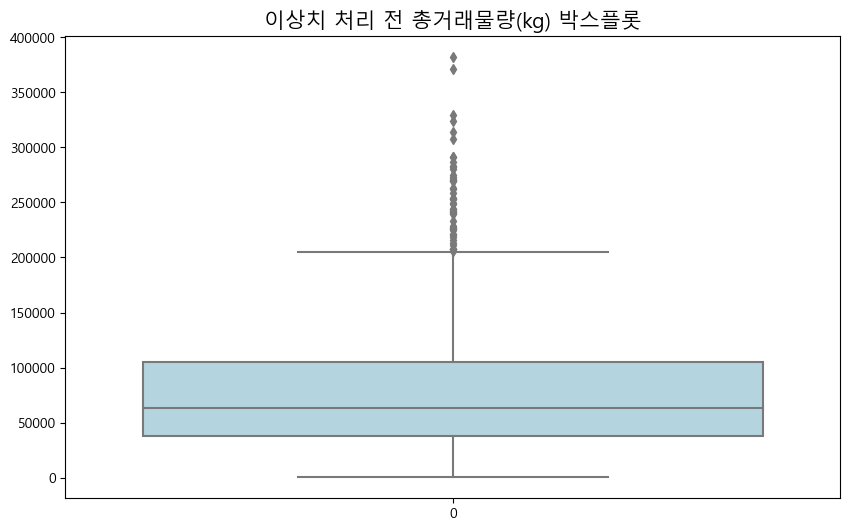

In [7]:
# 이상치 확인을 위한 박스플롯 그리기

# 이상치 처리 전 박스플롯
plt.figure(figsize=(10, 6))
sns.boxplot(data=fin_df['총거래물량(kg)'], color='lightblue')
plt.title('이상치 처리 전 총거래물량(kg) 박스플롯', size=15)
plt.show()

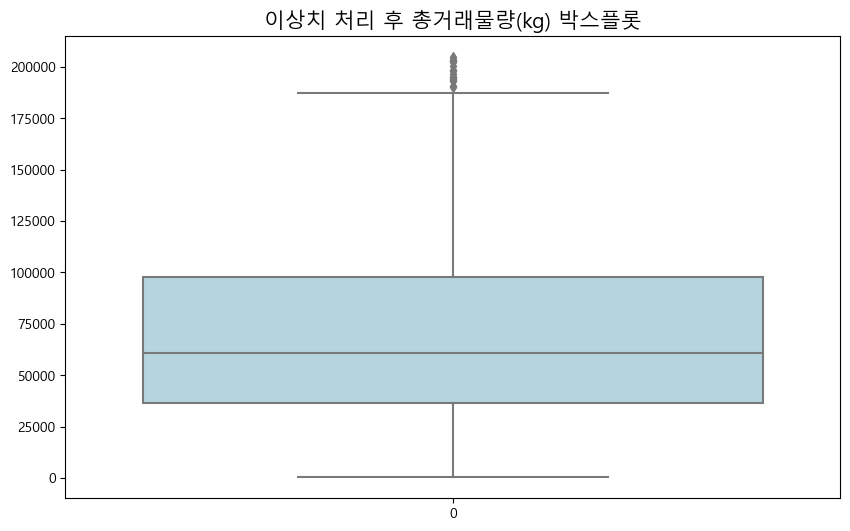

In [8]:
# 이상치 제거 함수
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filter = (df[column] >= lower_bound) & (df[column] <= upper_bound)
    return df.loc[filter]

# 이상치 제거
fin_df_clean = remove_outliers(fin_df, '총거래물량(kg)')

# 이상치 처리 후 박스플롯
plt.figure(figsize=(10, 6))
sns.boxplot(data=fin_df_clean['총거래물량(kg)'], color='lightblue')
plt.title('이상치 처리 후 총거래물량(kg) 박스플롯', size=15)
plt.show()

In [9]:
fin_df_clean

,총거래물량(kg),5달전평균기온,3달전최고기온,3달전평균일교차,5달전평균강우량,3달전평균강우량,5달전평균결로시간,3달전평균결로시간,특,상,총거래금액(원)
0,1200.0,12.753642,12.465556,11.214444,3.846358,0.770000,334.735099,275.722222,1,0,2859000
1,69636.0,12.578808,12.225556,11.157778,3.790066,0.770000,333.331126,275.722222,23,5,159041400
2,81055.0,12.401987,12.011111,11.101111,3.786755,0.767778,332.960265,274.044444,16,8,140294100
3,202560.0,12.069536,11.763333,11.203333,3.538411,0.690000,326.026490,256.111111,30,9,459338400
4,144105.0,11.909934,11.582222,11.132222,3.541722,0.762222,325.251656,259.655556,20,6,309839600
...,...,...,...,...,...,...,...,...,...,...,...
1211,37125.0,14.993377,13.853333,10.798889,5.582781,2.488889,280.516556,214.633333,6,4,147007600
1212,67630.0,14.821192,13.655556,10.826667,5.582781,2.461111,280.516556,198.744444,8,5,255980200
1213,66330.0,14.643709,13.448889,10.846667,5.582781,2.461111,280.509934,193.166667,11,6,257729800
1214,56365.0,14.461589,13.252222,10.878889,5.582781,2.461111,280.509934,193.166667,10,8,250837000


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import xgboost as xgb


from sklearn.preprocessing import StandardScaler
# 스케일러 초기화
scaler = StandardScaler()


# Define the feature columns and the target variable
features = fin_df_clean.columns.drop('총거래물량(kg)')
target = '총거래물량(kg)'

# Splitting the fin_df_clean into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(fin_df_clean[features], fin_df_clean[target], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# 스케일러 초기화
scaler = StandardScaler()

# 훈련 데이터에 대해 fit과 transform 수행
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Initialize models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)
lgbm_model = LGBMRegressor(random_state=42)
cat_model = CatBoostRegressor(random_state=42)
ada_model = AdaBoostRegressor(random_state=42)


# 평가 검증 함수
def train_and_evaluate(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    return y_pred, mse, r2

# Train and evaluate Linear Regression
lr_pred, lr_mse, lr_r2 = train_and_evaluate(lr_model, X_train, y_train, X_val, y_val)

# Train and evaluate Random Forest
rf_pred, rf_mse, rf_r2 = train_and_evaluate(rf_model, X_train, y_train, X_val, y_val)

# Train and evaluate Gradient 
gb_pred, gb_mse, gb_r2 = train_and_evaluate(gb_model, X_train, y_train, X_val, y_val)

# Train and evaluate XGBoost
xgb_pred, xgb_mse, xgb_r2 = train_and_evaluate(xgb_model, X_train, y_train, X_val, y_val)

# Train and evaluate LGBM
lgbm_pred, lgbm_mse, lgbm_r2 = train_and_evaluate(lgbm_model, X_train, y_train, X_val, y_val)

# Train and evaluate Cat
cat_pred, cat_mse, cat_r2 = train_and_evaluate(cat_model, X_train, y_train, X_val, y_val)

# Train and evaluate Ada
ada_pred, ada_mse, ada_r2 = train_and_evaluate(ada_model, X_train, y_train, X_val, y_val)

# 성능 출력
results = [
    ("선형회귀", lr_mse, lr_r2),
    ("랜덤포레스트", rf_mse, rf_r2),
    ("그래디언트 부스팅", gb_mse, gb_r2),
    ("XGBoost", xgb_mse, xgb_r2),
    ("LGBM", lgbm_mse, lgbm_r2),
    ("CatBoost", cat_mse, cat_r2),
    ("AdaBoost", ada_mse, ada_r2)
]

for model, mse, r2 in results:
    print(f"{model}: 평균제곱오차(MSE) = {mse}, 결정계수(R2) = {r2}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000133 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1955
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 10
[LightGBM] [Info] Start training from score 70291.695458
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

In [ ]:
Plotting results
fig, ax = plt.subplots(7, 1, figsize=(10, 15))
ax[0].plot(y_val.values, label='Actual')
ax[0].plot(lr_pred, label='LR Prediction')
ax[0].set_title('Linear Regression Predictions')
ax[0].legend()

ax[1].plot(y_val.values, label='Actual')
ax[1].plot(rf_pred, label='RF Prediction')
ax[1].set_title('Random Forest Predictions')
ax[1].legend()

ax[2].plot(y_val.values, label='Actual')
ax[2].plot(gb_pred, label='GB Prediction')
ax[2].set_title('Gradient Boost Predictions')
ax[2].legend()

ax[3].plot(y_val.values, label='Actual')
ax[3].plot(xgb_pred, label='XGB Prediction')
ax[3].set_title('XGBoost Predictions')
ax[3].legend()

ax[4].plot(y_val.values, label='Actual')
ax[4].plot(lgbm_pred, label='LGBM Prediction')
ax[4].set_title('LGBM Predictions')
ax[4].legend()

ax[5].plot(y_val.values, label='Actual')
ax[5].plot(cat_pred, label='Catboost Prediction')
ax[5].set_title('Catboost Predictions')
ax[5].legend()

ax[6].plot(y_val.values, label='Actual')
ax[6].plot(ada_pred, label='ADAboost Prediction')
ax[6].set_title('ADAboost Predictions')
ax[6].legend()


In [39]:
import plotly.graph_objects as go

# 가정된 평가지표 값 (실제 계산된 값으로 교체 필요)
mse_value = 188965601.78887507  # MSE 값을 예로 들었습니다.
r2_value = 0.9483627569021309       # R² 값을 예로 들었습니다.

fig = go.Figure()

# 실제값
fig.add_trace(go.Scatter(y=y_val.values, mode='lines', name='실제값'))

# 예측값
fig.add_trace(go.Scatter(y=cat_pred, mode='lines', name='예측값'))

fig.update_layout(
    title={
        'text': '캣부스트 모델을 활용한 영주시 사과 총거래물량 실제값과 예측값 비교 시각화',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis=dict(
        showticklabels=False,  # x축 라벨을 숨김
    ),
    yaxis_title='총거래물량',
    legend_title='범례',
    width=1200,  # 그래프의 폭을 1200px로 설정
    height=600   # 그래프의 높이를 600px로 설정
)

# # 주석 추가
# fig.add_annotation(
#     text=f'MSE: {mse_value:.2f}<br>R²: {r2_value:.2f}',  # .2f는 소수점 두 자리까지 표시
#     align='left',
#     showarrow=False,
#     xref='paper',  # 그래프의 비율 좌표계를 사용
#     yref='paper',
#     x=1,  # 그래프의 오른쪽 끝에 위치
#     y=1,  # 그래프의 상단에 위치
#     bordercolor='black',
#     borderwidth=1
# )

fig.show()

In [40]:

data_df = pd.DataFrame({
    '실제값': y_val,
    '예측값': cat_pred
})

data_df.to_excel('./catboost.xlsx', index=False)

In [41]:
data_df

,실제값,예측값
532,126070.0,128701.998910
253,68800.0,67828.257329
581,36140.0,48519.680668
729,28910.0,29792.935376
1021,71730.0,65701.141346
...,...,...
271,72264.0,70614.235564
924,65585.0,90578.553245
957,38850.0,41036.132088
522,202860.0,181242.647002


In [42]:
data_df.to_excel('catboost.xlsx', index=False)

In [11]:
from sklearn.model_selection import GridSearchCV 

# 모델 초기화
cat_model = CatBoostRegressor(random_state=42, silent=True)

# 그리드 서치할 파라미터 설정 (더 세부적인 설정)
param_grid = {
    'depth': [3, 4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'iterations': [100, 500, 1000],
    'l2_leaf_reg': [1, 3, 5, 7, 9]  # 정규화 파라미터 추가
}

# 그리드 서치 객체 설정
grid_search = GridSearchCV(estimator=cat_model, param_grid=param_grid, cv=5, scoring='r2', verbose=2)

# 그리드 서치 실행
grid_search.fit(X_train_scaled, y_train)

# 최적 파라미터와 해당 점수 출력
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best cross-validation R2 score:", best_score)

# 최적의 모델로 예측 및 평가
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test MSE:", mse)
print("Test R2 score:", r2)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV] END depth=3, iterations=100, l2_leaf_reg=1, learning_rate=0.01; total time=   0.0s
[CV] END depth=3, iterations=100, l2_leaf_reg=1, learning_rate=0.01; total time=   0.0s
[CV] END depth=3, iterations=100, l2_leaf_reg=1, learning_rate=0.01; total time=   0.0s
[CV] END depth=3, iterations=100, l2_leaf_reg=1, learning_rate=0.01; total time=   0.0s
[CV] END depth=3, iterations=100, l2_leaf_reg=1, learning_rate=0.01; total time=   0.0s
[CV] END depth=3, iterations=100, l2_leaf_reg=1, learning_rate=0.05; total time=   0.0s
[CV] END depth=3, iterations=100, l2_leaf_reg=1, learning_rate=0.05; total time=   0.0s
[CV] END depth=3, iterations=100, l2_leaf_reg=1, learning_rate=0.05; total time=   0.0s
[CV] END depth=3, iterations=100, l2_leaf_reg=1, learning_rate=0.05; total time=   0.0s
[CV] END depth=3, iterations=100, l2_leaf_reg=1, learning_rate=0.05; total time=   0.0s
[CV] END depth=3, iterations=100, l2_leaf_reg=1, learnin

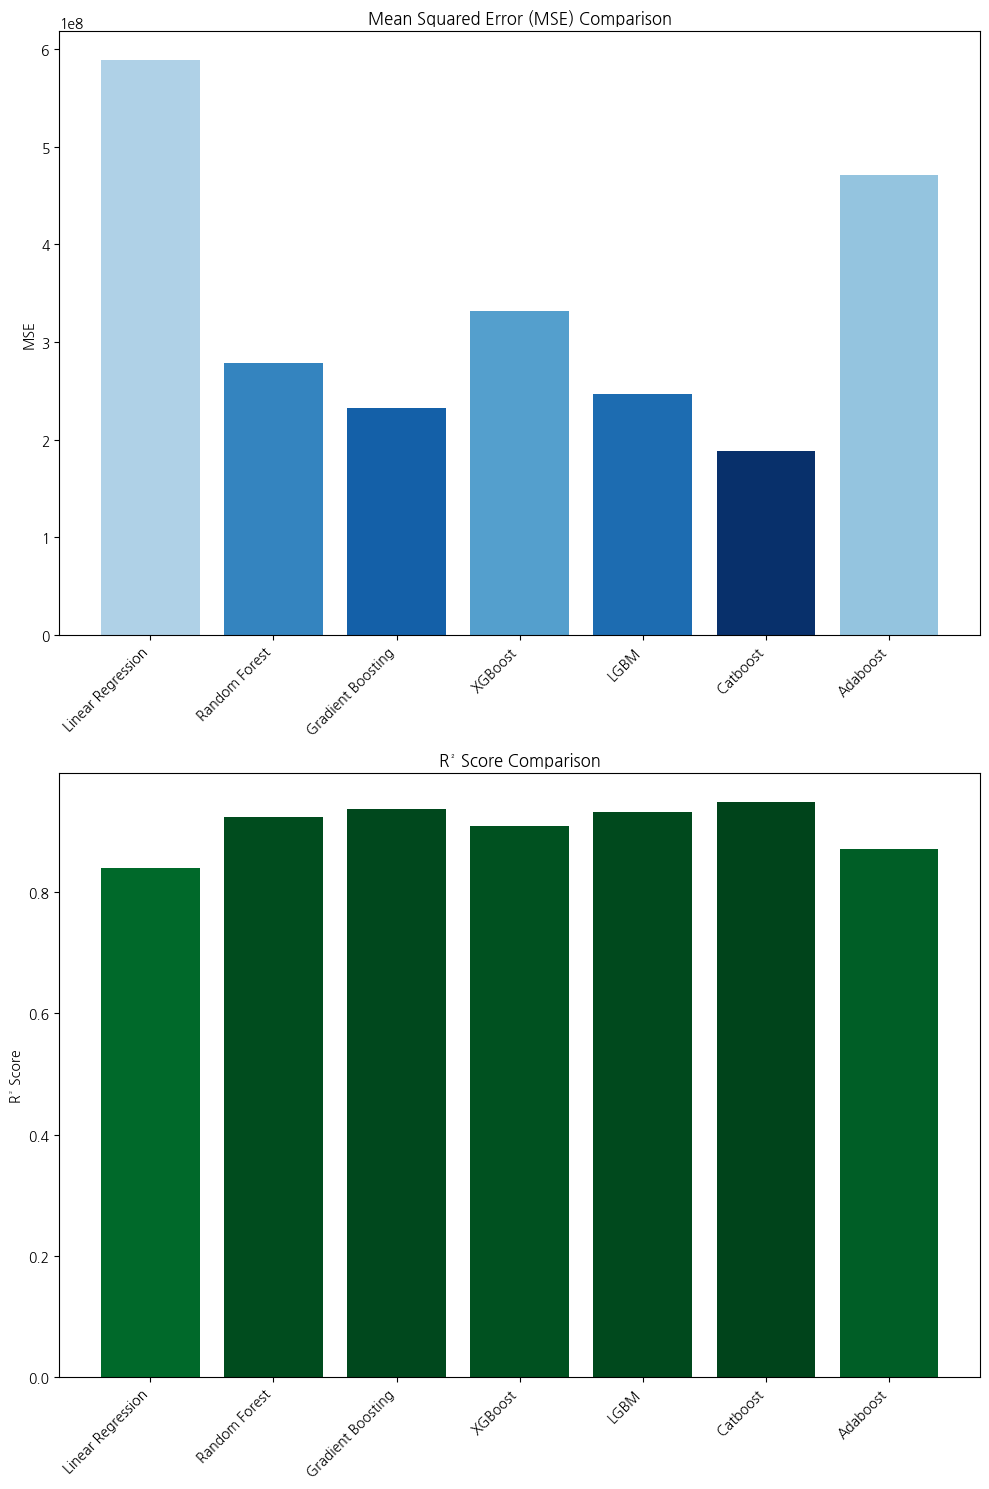

In [92]:
# Recreating the metrics dictionary with the simulated values
metrics = {
    'Linear Regression': {
        'MSE': lr_mse,
        'R2': lr_r2
    },
    'Random Forest': {
        'MSE': rf_mse,
        'R2': rf_r2
    },
    'Gradient Boosting': {
        'MSE': gb_mse,
        'R2': gb_r2
    },
    'XGBoost': {
        'MSE': xgb_mse,
        'R2': xgb_r2
    },
    'LGBM': {
        'MSE': lgbm_mse,
        'R2': lgbm_r2
    },
    'Catboost': {
        'MSE': cat_mse,
        'R2': cat_r2
    },
    'Adaboost': {
        'MSE': ada_mse,
        'R2': ada_r2
    }
}

# Bar data
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'LGBM', 'Catboost', 'Adaboost']
mses = [metrics[model]['MSE'] for model in models]
r2s = [metrics[model]['R2'] for model in models]


# Get the best MSE and the best R2 (the values for Catboost)
best_mse = metrics['Catboost']['MSE']
best_r2 = metrics['Catboost']['R2']

# Normalize the MSE and R2 values to get the color intensity
mse_intensity = [(best_mse / mse) for mse in mses]
r2_intensity = [(r2s[i] / best_r2) for i in range(len(r2s))]

# Generate colors based on the intensity
mse_colors = [plt.cm.Blues(intensity) for intensity in mse_intensity]
r2_colors = [plt.cm.Greens(intensity) for intensity in r2_intensity]

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 15))

# MSE plot with gradient colors
axs[0].bar(models, mses, color=mse_colors)
axs[0].set_title('Mean Squared Error (MSE) Comparison')
axs[0].set_ylabel('MSE')

# R2 plot with gradient colors
axs[1].bar(models, r2s, color=r2_colors)
axs[1].set_title('R² Score Comparison')
axs[1].set_ylabel('R² Score')

# Rotate the x-tick labels for both subplots
for ax in axs:
    ax.set_xticks(np.arange(len(models)))
    ax.set_xticklabels(models, rotation=45, ha='right')

plt.tight_layout()
plt.show()

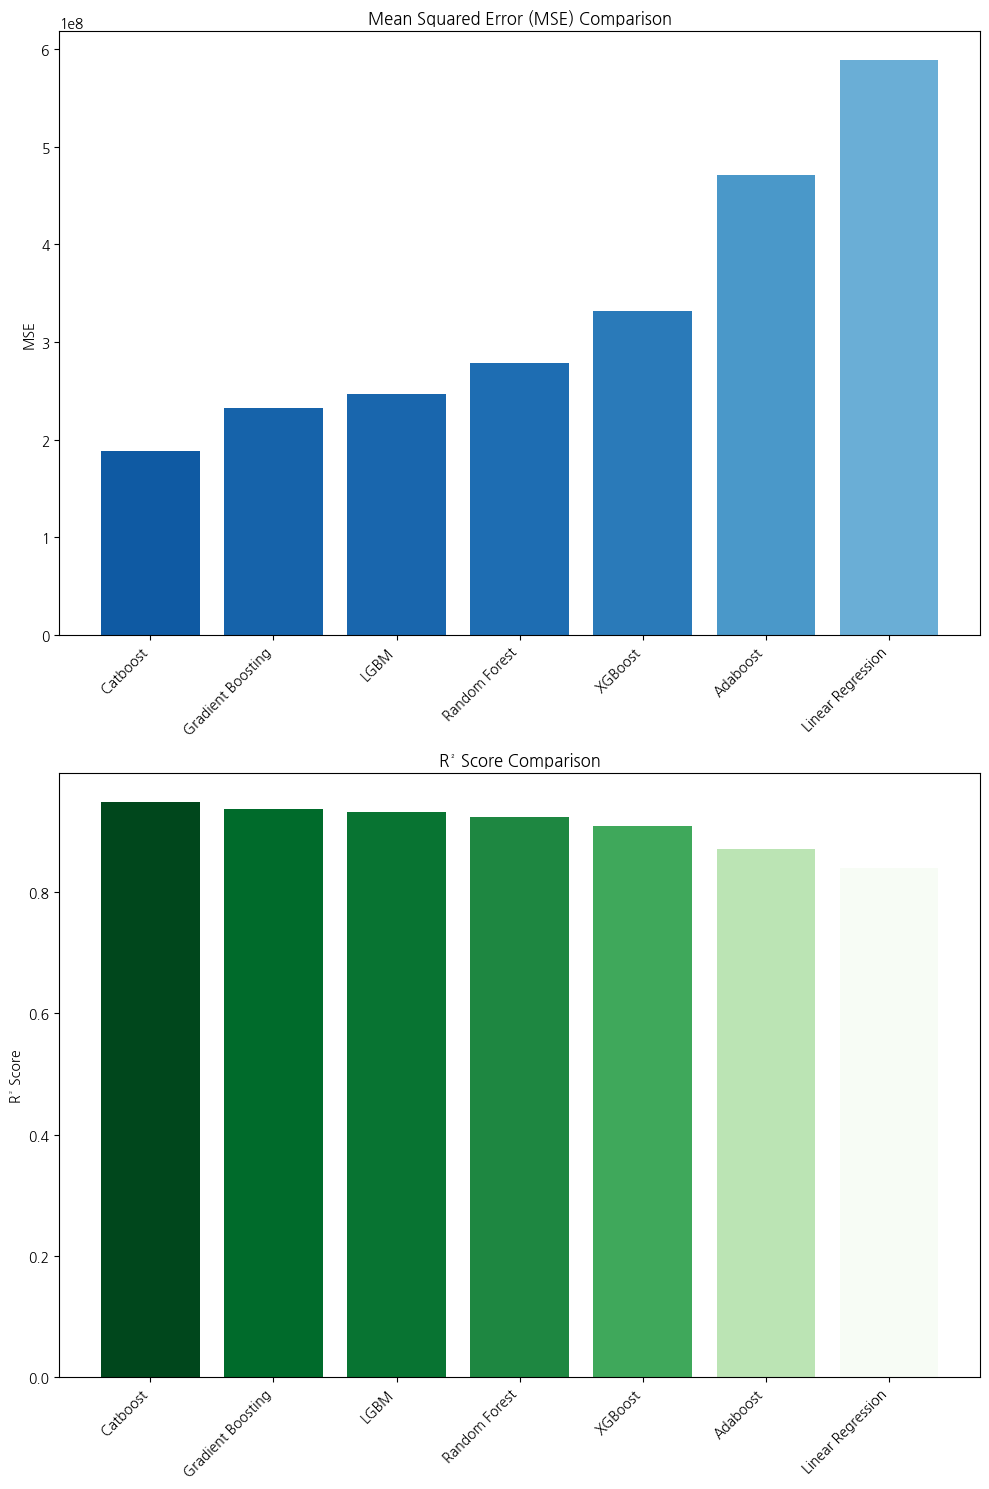

In [79]:
# Sorting the models by MSE and R2
sorted_by_mse = sorted(metrics.items(), key=lambda x: x[1]['MSE'])
sorted_by_r2 = sorted(metrics.items(), key=lambda x: x[1]['R2'], reverse=True)

# Generating the sorted lists of values and corresponding models
mse_values_sorted = [item[1]['MSE'] for item in sorted_by_mse]
mse_models_sorted = [item[0] for item in sorted_by_mse]
r2_values_sorted = [item[1]['R2'] for item in sorted_by_r2]
r2_models_sorted = [item[0] for item in sorted_by_r2]

# Normalizing and generating colors
mse_colors_sorted = [plt.cm.Blues(1 - (mse / max(mse_values_sorted))*0.5) for mse in mse_values_sorted]
r2_colors_sorted = [plt.cm.Greens((r2 - min(r2_values_sorted)) / (max(r2_values_sorted) - min(r2_values_sorted))*0.9) for r2 in r2_values_sorted]

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 15))

# MSE plot
axs[0].bar(mse_models_sorted, mse_values_sorted, color=mse_colors_sorted)
axs[0].set_title('Mean Squared Error (MSE) Comparison')
axs[0].set_ylabel('MSE')
axs[0].set_xticklabels(mse_models_sorted, rotation=45, ha='right')

# R2 plot
axs[1].bar(r2_models_sorted, r2_values_sorted, color=r2_colors_sorted)
axs[1].set_title('R² Score Comparison')
axs[1].set_ylabel('R² Score')
axs[1].set_xticklabels(r2_models_sorted, rotation=45, ha='right')

plt.tight_layout()
plt.show()


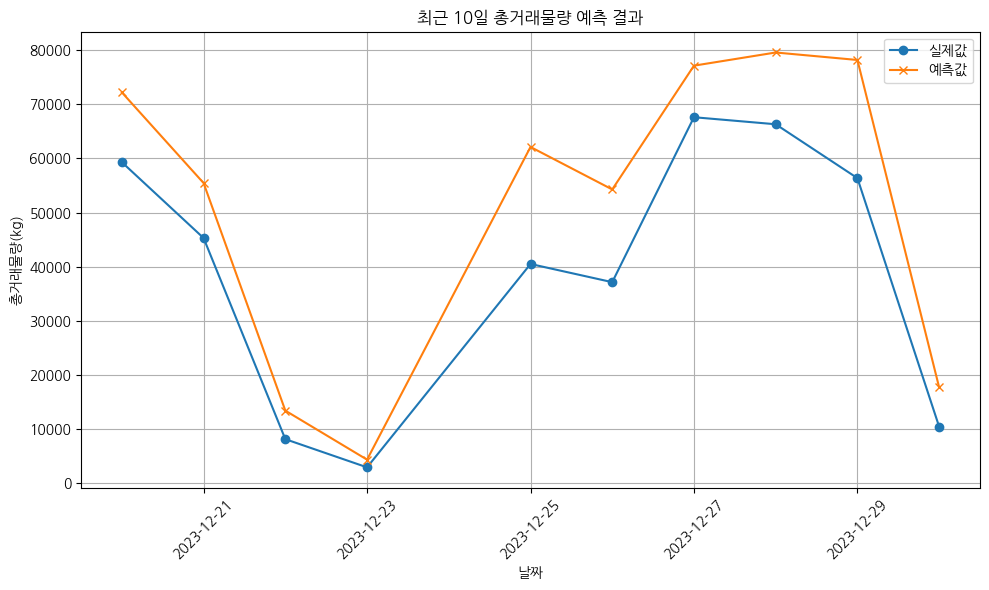

In [29]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# 예측에 사용할 데이터프레임을 준비합니다.
# 여기서는 데이터프레임을 df라고 가정하고 진행하겠습니다.

# 훈련 데이터 준비: 마지막 10일을 제외한 데이터를 훈련에 사용합니다.
train_df = fin_df.iloc[:-10]

# 테스트 데이터 준비: 마지막 10일 데이터를 예측에 사용합니다.
test_df = fin_df.iloc[-10:]

# 훈련 데이터와 테스트 데이터에서 특성과 타겟을 분리합니다.
X_train = train_df.drop(columns=['총거래물량(kg)'])
y_train = train_df['총거래물량(kg)']
X_test = test_df.drop(columns=['총거래물량(kg)'])

# 랜덤 포레스트 모델 생성 및 학습
model = RandomForestRegressor()
model.fit(X_train, y_train)

# 테스트 데이터를 사용하여 총거래물량 예측
predictions = model.predict(X_test)

# 실제값과 예측값 시각화
plt.figure(figsize=(10, 6))
plt.plot(test_df.index, test_df['총거래물량(kg)'], label='실제값', marker='o')
plt.plot(test_df.index, predictions, label='예측값', marker='x')
plt.xlabel('날짜')
plt.ylabel('총거래물량(kg)')
plt.title('최근 10일 총거래물량 예측 결과')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

최적의 하이퍼파라미터: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


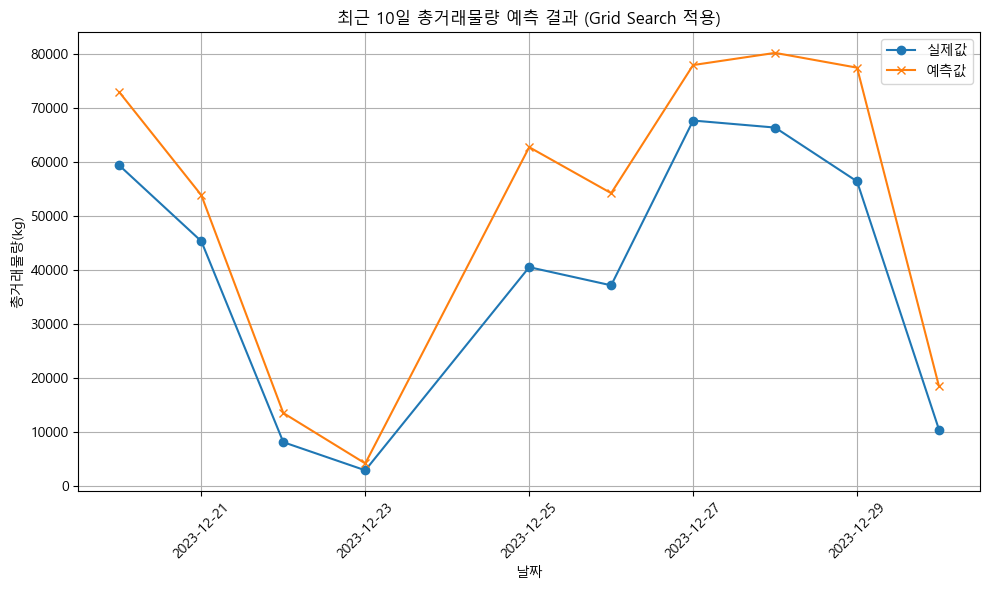

In [24]:
from sklearn.model_selection import GridSearchCV

# 랜덤 포레스트 모델 생성
rf_model = RandomForestRegressor()

# 그리드 서치를 위한 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200, 300],  # 트리 개수
    'max_depth': [None, 10, 20, 30],   # 트리 최대 깊이
    'min_samples_split': [2, 5, 10],   # 내부 노드를 분할하는 데 필요한 최소 샘플 수
    'min_samples_leaf': [1, 2, 4]      # 리프 노드에 필요한 최소 샘플 수
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# 훈련 데이터에 그리드 서치 적용
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)

# 최적의 모델 선택
best_rf_model = grid_search.best_estimator_

# 테스트 데이터를 사용하여 총거래물량 예측
predictions = best_rf_model.predict(X_test)

# 실제값과 예측값 시각화
plt.figure(figsize=(10, 6))
plt.plot(test_df.index, test_df['총거래물량(kg)'], label='실제값', marker='o')
plt.plot(test_df.index, predictions, label='예측값', marker='x')
plt.xlabel('날짜')
plt.ylabel('총거래물량(kg)')
plt.title('최근 10일 총거래물량 예측 결과 (Grid Search 적용)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [42]:
from statsmodels.tsa.vector_ar.var_model import VAR

# VAR 모델 생성 및 학습
model = VAR(fin_df)
var_results = model.fit()

# 2030년까지의 예측값 생성
forecast_steps = 365 * 50  # 7년치 데이터 예측
forecast = var_results.forecast(fin_df.values[-var_results.k_ar:], steps=forecast_steps)

# 예측 결과를 데이터프레임으로 변환
forecast_df = pd.DataFrame(forecast, index=pd.date_range(start='2023-12-31', periods=forecast_steps, freq='D'), columns=fin_df.columns)

# 총거래물량(kg) 예측값 출력
print("2030년 총거래물량 예측값:")
print(forecast_df['총거래물량(kg)'])



2030년 총거래물량 예측값:
2023-12-31    36367.737916
2024-01-01    50292.995610
2024-01-02    57680.210337
2024-01-03    61499.071453
2024-01-04    63356.357383
                  ...     
2073-12-13    69039.958147
2073-12-14    69039.748723
2073-12-15    69039.562210
2073-12-16    69039.398674
2073-12-17    69039.258173
Freq: D, Name: 총거래물량(kg), Length: 18250, dtype: float64


c:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


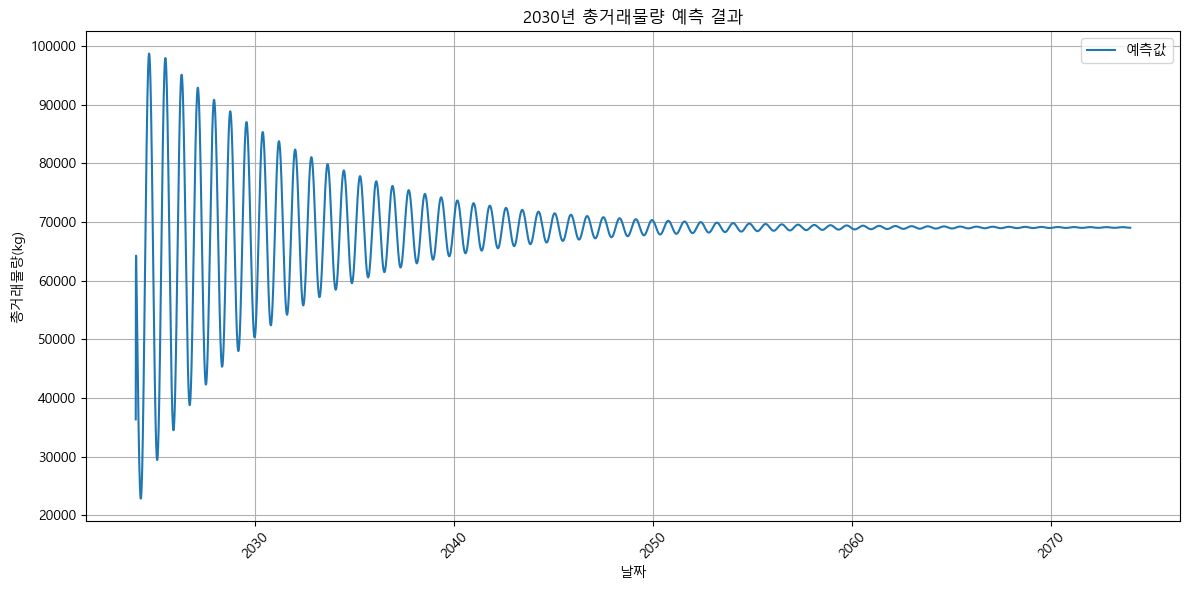

In [43]:
# 총거래물량(kg) 예측값 시각화
plt.figure(figsize=(12, 6))
plt.plot(forecast_df.index, forecast_df['총거래물량(kg)'], label='예측값')
plt.xlabel('날짜')
plt.ylabel('총거래물량(kg)')
plt.title('2030년 총거래물량 예측 결과')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
